<a href="https://colab.research.google.com/github/KrystianWasil/licencjat/blob/main/licencjat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Język python, implementacja algorytmów

##Mnożenie macierzy

###Metoda naiwna bez biblioteki numpy:


In [ ]:
import random
import cProfile

rows = 1024
columns = 1024
min_value = -1000
max_value = 1000
matrix_1 = [[random.randint(min_value, max_value) for i in range(columns)] for j in range(rows)]
matrix_2 = [[random.randint(min_value, max_value) for i in range(columns)] for j in range(rows)]

#mnozenie macierzy

def multiply_matrix(matrix_1, matrix_2):
    result = [[0 for i in range(len(matrix_2[0]))] for j in range(len(matrix_1))] # tworzenie macierzy wynikowej
    for i in range(len(matrix_1)):
        for j in range(len(matrix_2[0])):
            for k in range(len(matrix_2)):
                result[i][j] += matrix_1[i][k] * matrix_2[k][j]

cProfile.run('multiply_matrix(matrix_1, matrix_2)')

'''Złożoność obliczeniowa wynosi O(n^3)'''

         1050631 function calls in 452.746 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1  452.392  452.392  452.779  452.779 <ipython-input-57-d706390c904f>:13(multiply_matrix)
        1    0.001    0.001    0.057    0.057 <ipython-input-57-d706390c904f>:14(<listcomp>)
        1    0.023    0.023  452.802  452.802 <string>:1(<module>)
        1    0.000    0.000  452.802  452.802 {built-in method builtins.exec}
  1050626    0.329    0.000    0.329    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




'Złożoność obliczeniowa wynosi O(n^3)'

###Wykorzystanie biblioteki Numpy

In [ ]:
import cProfile as cp
import numpy as np
import random

rows = 1024
columns = 1024
min_value = -1000
max_value = 1000

matrix_1 = np.random.randint(min_value, max_value, (rows, columns))
matrix_2 = np.random.randint(min_value, max_value, (rows, columns))

cp.run('np.dot(matrix_1, matrix_2)')

         4 function calls in 5.823 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    5.823    5.823    5.823    5.823 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 multiarray.py:741(dot)
        1    0.000    0.000    5.823    5.823 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
,

###Alogrytm Stressena
Algorytm ten jest specyficzny, ma najlepszą wydajność dla rozmiarów potęgi dwójki (coś takiego)


In [ ]:
import numpy as np
import cProfile
import tracemalloc

rows = 1024
columns = 1024
min_value = -1000
max_value = 1000

matrix_1 = np.random.randint(min_value, max_value, (rows, columns))
matrix_2 = np.random.randint(min_value, max_value, (rows, columns))

# Funkcje pomocnicze

def split(matrix): #to jest to dzielenie na macierze klatkowe A = [[A1,1 A1,2]
                                                               #  [ A2,1 A2,2]]
    row, col = matrix.shape
    new_row, new_col = row // 2, col // 2
    return (
        matrix[:new_row, :new_col],
        matrix[:new_row, new_col:],
        matrix[new_row:, :new_col],
        matrix[new_row:, new_col:]
    )

def stressen_algorithm(matrix_1, matrix_2):
    n = matrix_1.shape[0]

    # Użyłem tradycyjnej metody dla małych macierzy
    if n <= 64:  # Ustalam próg, poniżej którego używasz tradycyjnego mnożenia
        return np.dot(matrix_1, matrix_2)


    a, b, c, d = split(matrix_1)
    e, f, g, h = split(matrix_2)


    m1 = stressen_algorithm(a, f - h)
    m2 = stressen_algorithm(a + b, h)
    m3 = stressen_algorithm(c + d, e)
    m4 = stressen_algorithm(d, g - e)
    m5 = stressen_algorithm(a + d, e + h)
    m6 = stressen_algorithm(b - d, g + h)
    m7 = stressen_algorithm(a - c, e + f)


    c11 = m5 + m4 - m2 + m6
    c12 = m1 + m2
    c21 = m3 + m4
    c22 = m1 + m5 - m3 - m7

    c = np.empty((n, n), dtype=matrix_1.dtype)
    c[:n//2, :n//2] = c11
    c[:n//2, n//2:] = c12
    c[n//2:, :n//2] = c21
    c[n//2:, n//2:] = c22

    return c

# Profilowanie
tracemalloc.start()
cProfile.run('stressen_algorithm(matrix_1, matrix_2)')
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")

         6405 function calls (3605 primitive calls) in 1.315 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      800    0.014    0.000    0.014    0.000 <ipython-input-1-2ca679abe824>:15(split)
   2801/1    1.296    0.000    1.315    1.315 <ipython-input-1-2ca679abe824>:26(stressen_algorithm)
        1    0.000    0.000    1.315    1.315 <string>:1(<module>)
     2401    0.002    0.000    0.002    0.000 multiarray.py:741(dot)
        1    0.000    0.000    1.315    1.315 {built-in method builtins.exec}
      400    0.003    0.000    0.003    0.000 {built-in method numpy.empty}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


Current memory usage is 0.176539MB; Peak was 42.54042MB


###Zrównoleglenie algorytmu stressena



##Metody rozwiązywania równań

In [ ]:
#TEST
import numpy as np

#Macierz A -> macierz ze współczynnikam, b -> macierz z wynikami musimy je połączyć w jeność [A|b]
A = np.array([[2.0,1.0,-1.0],[1.0,-1.0,1.0],[-3.0,2.0,0.0]])
b = np.array([2.0,-5.0,17.0]) # to jest na razie w postaci tablicy dlatego uzyjemy reshapa

#funkcja hstack połaczy to nam ładnie
Ab = np.hstack([A,b.reshape(-1,1)])
# print(b.reshape(-1,1))
# print(type(Ab[0:1,0]))
# print(type(Ab[1][2]))
                     #1 iteracja
# [[ 1  2 -1  3]  ->    [[3 1 1 8]
#  [ 2 -1  3  7]   ->      [2 -1 3 7]
#  [ 3  1  1  8]]        [1 2 -1 3]]

#Zgodnnie z algorytmem rozpisasnym przeze mnie kolejen kroki to znaleźć pivota

n = Ab.shape[0] #liczba wierszy
 #iterujemy po wsyztkich wierszach
for i in range(0, n):
    pivot = np.argmax(np.abs(Ab[i:n,i])) + i
    Ab[[i, pivot]] = Ab[[pivot, i]]

    #iterowanie dale
    for j in range(i + 1,n):
        factor = Ab[j][i]/Ab[i][i]
        Ab[j] -= factor * Ab[i]

# print(np.round(Ab,2))

solution = np.zeros(n)
for i in reversed(range(n)):
    # solution[i] = (Ab[i][n] - sum(Ab[i][j] * solution[j] for j in range(i + 1, n))) / Ab[i][i]
    solution[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], solution[i+1:n])) / Ab[i, i]

print(solution.reshape(-1,1).astype(int))

Rozwiązanie:
[[-1]
 [ 7]
 [ 3]]


$$x_{i}^{(k+1)}={\frac {1}{a_{ii}}}\left(b_{i}-\sum _{j\neq i}a_{ij}x_{j}^{(k)}\right),\quad i=1,2,\ldots ,n.$$

In [ ]:
# import numpy as np
# from IPython.display import display, HTML

# link = "https://en.wikipedia.org/wiki/Jacobi_method"
# display(HTML(f'<a href="{link}" target="_blank">{link}</a>'))

# #jacobi iteration metod

# # k = 0
# # while convergence not reached do
# #     for i := 1 step until n do
# #         σ = 0
# #         for j := 1 step until n do
# #             if j ≠ i then
# #                 σ = σ + aij xj(k)
# #             end
# #         end
# #         xi(k+1) = (bi − σ) / aii
# #     end
# #     increment k
# # end

# MAX_TERATION = 1000
# A = np.array([[10., -1., 2., 0.],
#               [-1., 11., -1., 3.],
#               [2., -1., 10., -1.],
#               [0.0, 3., -1., 8.]])
# b = np.array([6., 25., -11., 15.])
# x = np.zeros_like(b)
# for i in range(MAX_TERATION):
#     x_new = np.zeros_like(x)
#     for j in range(A.shape[0]):
#         s1 = np.dot(A[j, :j], x[:j])
#         s2 = np.dot(A[j, j + 1:], x[j + 1:])
#         x_new[j] = (b[j] - s1 -s2)/A[j,j]
#         if x_new[j] == x_new[j-1]:
#             break

#     if np.linalg.norm(x_new - x, ord=np.inf) < 1e-10:
#         break
#     x = x_new

# print(x)


import numpy as np

# Definicja macierzy A i wektora b
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0., 3., -1., 8.]])
b = np.array([6., 25., -11., 15.])

# Wektor początkowy x (inicjalizacja zerowa)
x = np.zeros_like(b)

# Parametry iteracyjne
MAX_ITERATION = 1000
TOLERANCE = 1e-10

# Algorytm iteracyjny Jacobiego
for k in range(MAX_ITERATION):
    x_new = np.zeros_like(x)  # Wektor, który przechowuje wyniki nowej iteracji
    for i in range(A.shape[0]):
        # Oblicz sumy z lewej i prawej strony równania
        s1 = np.dot(A[i, :i], x[:i])  # Suma elementów przed i-tym
        s2 = np.dot(A[i, i + 1:], x[i + 1:])  # Suma elementów po i-tym
        # Aktualizacja wartości x dla danego i
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if x_new[i] == x[i]:
            break

    # Sprawdzenie warunku zbieżności
    if np.linalg.norm(x_new - x, ord=np.inf) < TOLERANCE:
        print(f"Konwergencja osiągnięta po {k + 1} iteracjach.")
        break

    # Aktualizacja wektora x
    x = x_new
else:
    print("Nie osiągnięto konwergencji w maksymalnej liczbie iteracji.")

# Wynik
print("Rozwiązanie:")
print(x)



Konwergencja osiągnięta po 29 iteracjach.
Rozwiązanie:
[ 1.  2. -1.  1.]


In [ ]:
import numpy as np

MAX_ITERATION = 1000
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0., 3., -1., 8.]])
b = np.array([6., 25., -11., 15.])

for k in range(MAX_ITERATION):
    if x is None:
        x = np.zeros(len(A[0]))



In [ ]:
# import numpy as np

# def jacobi(A, b, x0=None, tol=1e-10, max_iter=100):
#     """
#     Rozwiązuje układ równań Ax = b za pomocą algorytmu Jacobiego.

#     A: macierz współczynników (2D)
#     b: wektor wyników (1D)
#     x0: początkowe przybliżenie rozwiązania (1D) (domyślnie 0)
#     tol: tolerancja (domyślnie 1e-10)
#     max_iter: maksymalna liczba iteracji (domyślnie 100)

#     Zwraca:
#     x: rozwiązanie układu równań
#     """
#     n = len(b)
#     x = np.zeros_like(b) if x0 is None else x0.copy()
#     for i in range(max_iter):
#         x_new = np.zeros_like(x)
#         for j in range(n):
#             sum_ = b[j]
#             for k in range(n):
#                 if k != j:
#                     sum_ -= A[j, k] * x[k]
#             x_new[j] = sum_ / A[j, j]

#         # Sprawdzenie warunku zakończenia
#         if np.linalg.norm(x_new - x, ord=np.inf) < tol:
#             return x_new

#         x = x_new

#     raise Exception(f"Algorytm nie zbiega się po {max_iter} iteracjach.")

# # Przykład użycia
# A = np.array([[4, -1, 0, 0], [-1, 4, -1, 0], [0, -1, 4, -1], [0, 0, -1, 3]], dtype=float)
# b = np.array([15, 10, 10, 10], dtype=float)

# x0 = np.zeros_like(b)  # Początkowe przybliżenie
# x = jacobi(A, b, x0)

# print("Rozwiązanie:", x)
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])
print(A[0:,3])

[ 0.  3. -1.  8.]


In [ ]:
# from sklearn.datasets import load_wine
# import pandas as pd

# # Wczytaj dane
# data = load_wine(as_frame=True)
# df = data.frame  # Dane jako DataFrame

# # Zapisz do pliku CSV
# df.to_csv("wine.csv", index=False)

# print("Zapisano zestaw danych do pliku wine.csv")

Zapisano zestaw danych do pliku wine.csv


##Przetwarzanie dużych zbiorów danych

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine(as_frame=True)
data = data.frame

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
data.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [ ]:
data.shape

(178, 14)

In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
#filtorwanie chce znalezc tylko te wina ktore maja kolor intensywnijeszy niz 45

(data['color_intensity'] > 12).sum()


1

In [ ]:
data[data['color_intensity'] > 12]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
158,14.34,1.68,2.7,25.0,98.0,2.8,1.31,0.53,2.7,13.0,0.57,1.96,660.0,2


In [ ]:
#czy są jakies z magnezem ponizej 100 ???
data[data['magnesium'] < 100]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.000000,1.17,2.82,1280.0,0
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.600000,1.15,2.90,1320.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0,2


In [ ]:
data[(data['alcohol'] < 12) & (data['magnesium'] > 100)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0,1
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1


In [ ]:
#sortowanie rosnace
data.sort_values(by='alcohol')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,0


In [ ]:
data.sort_values(by='alcohol', ascending=False)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1


In [ ]:
print(data['alcohol'].min())
print(data['alcohol'].max())
print(data['alcohol'].mean())
print(data['alcohol'].median())

11.03
14.83
13.00061797752809
13.05
0.8118265380058577


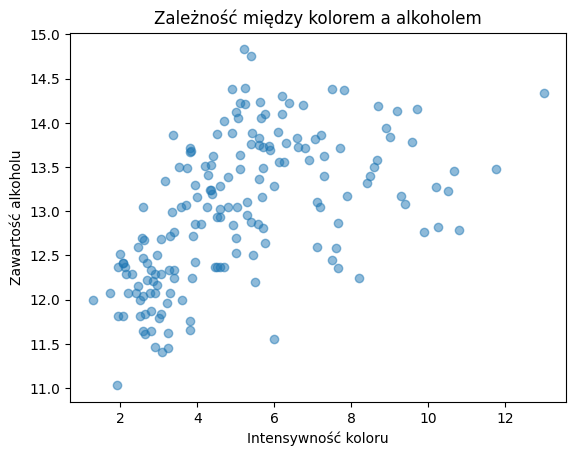

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['color_intensity'], data['alcohol'], alpha=0.5)
plt.xlabel('Intensywność koloru')
plt.ylabel('Zawartość alkoholu')
plt.title('Zależność między kolorem a alkoholem')
plt.show()

In [ ]:
#normalizacja
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['color_intensity', 'alcohol']] = scaler.fit_transform(data[['color_intensity', 'alcohol']])
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,0.372014,1.04,3.92,1065.0,0
1,0.571053,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,0.264505,1.05,3.40,1050.0,0
2,0.560526,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,0.375427,1.03,3.17,1185.0,0
3,0.878947,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,0.556314,0.86,3.45,1480.0,0
4,0.581579,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,0.259386,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,0.547782,0.64,1.74,740.0,2
174,0.623684,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,0.513652,0.70,1.56,750.0,2
175,0.589474,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,0.761092,0.59,1.56,835.0,2
176,0.563158,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,0.684300,0.60,1.62,840.0,2


##Algorytmy numeryczne

In [ ]:
#Założenie że muszą być różne znaki (wtedy mamy pewność ze zawsze bedzię chociaż jedno rozwiązanie) twierdzenie Darboux
#wersja z petla
# import math

# def func(x):
#     return x**2 - x - 2

# def bisection(a,b,Eps):
#     while b-a > Eps:
#         x = (a + b) / 2

#         if abs(func(x)) <= Eps:
#             return x
#         elif func(a) * func(x) < 0:
#             b = x
#         else:
#             a = x

# bisection(1,5,1e-6)

def func(x):
    return x**2 - x - 2

def bisection(a, b, eps):
    while b - a > eps:
        x = (a + b) / 2
        f_x = func(x)

        if abs(f_x) <= eps:
            return x
        # Wybieramy nowy przedział na podstawie znaku f(x)
        (a, b) = (a, x) if func(a) * f_x < 0 else (x, b)

    return (a + b) / 2  # Przybliżenie rozwiązania po zakończeniu pętli

result = bisection(1, 5, 1e-6)
print(result)

















2.0


In [ ]:
#rekurencyjne podejcie
def func(x):
    return x**2 - x - 2

def bisection(a,b,Eps):
    if ((func((a+b)/2)==0)or((b-a)<Eps)):
        return (a+b)/2
    elif (func(a)*func((a+b)/2)<0):
        return bisection(a,(a+b)/2,Eps)
    else:
        return bisection((a+b)/2,b,Eps)

bisection(-3,5,1e-6)

-1.0

##Algorytmy uczenia maszynowego

####Simple Linear Regression:
Simple linear regression is used when there is a linear relationship between the independent variable X and dependent variable Y. The mathematical formula for simple linear regression is:

$Y = \beta_{0} + \beta_{1}X + \epsilon$

where,

* Y is the dependent variable
* X is the independent variable
* $\beta_{0}$ is the intercept
* $\beta_{1}$ is the slope
* $\epsilon$ is the error term.

In [ ]:
#implementacja Simple Linear Regression
#Źródło :

from IPython.display import display, HTML

link = "https://en.wikipedia.org/wiki/Simple_linear_regression"
display(HTML(f'<a href="{link}" target="_blank">{link}</a>'))

link2 = "https://www.geeksforgeeks.org/linear-regression-python-implementation/"
display(HTML(f'<a href="{link2}" target="_blank">{link2}</a>'))


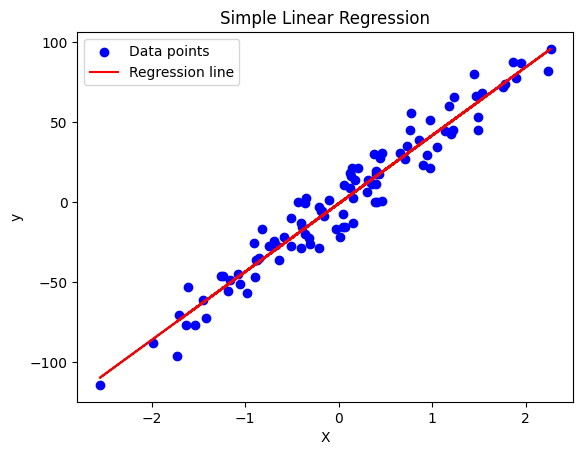

Intercept (alpha): -0.8141818270307257
Slope (beta): 42.619430291366946


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

class SimpleLinearRegression():
    def __init__(self):
        self.alfa = 0
        self.beta = 0

    def fit(self, X, y):
        self.beta = np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
        self.alfa = np.mean(y) - self.beta * np.mean(X)

    def predict(self, X):
        return self.alfa + self.beta * X

    def coefficients(self):
        return self.alfa, self.beta

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
X = X.flatten()

model = SimpleLinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

print("Intercept (alpha):", model.coefficients()[0])
print("Slope (beta):", model.coefficients()[1])

Text(0.5, 1.0, 'Linear Regression')

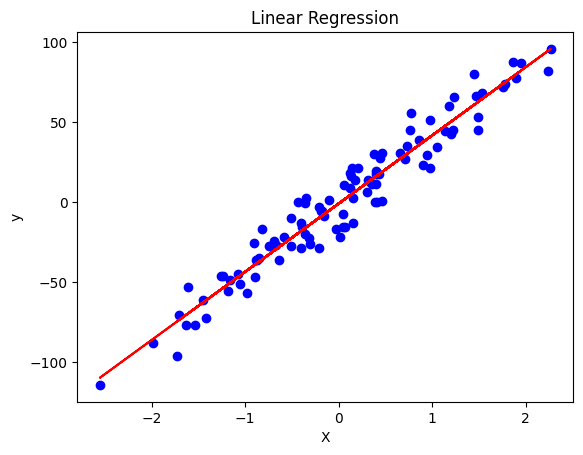

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

Xx,yy = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
Xx = Xx.flatten()

model = LinearRegression()
model.fit(Xx.reshape(-1, 1), yy)

y_pred = model.predict(Xx.reshape(-1, 1))

plt.scatter(Xx, yy, color='blue', label='Data points')
plt.plot(Xx, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X,y = load_diabetes(return_X_y=True, as_frame=True, scaled=True)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
le = LinearRegression()
le.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = le.predict(X_test)
y_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [ ]:
import pandas as pd
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
287,219.0,139.547558
211,70.0,179.517208
72,202.0,134.038756
321,230.0,291.417029
73,111.0,123.789659
...,...,...
255,153.0,115.011800
90,98.0,78.955842
57,37.0,81.560873
391,63.0,54.379973


(200, 3)
Mean Squared Error (Custom Model): 298.4033866292117
Intercept: -0.9546742543629398
Coefficients: [71.82784635 22.35108511 72.61417828]
Mean Squared Error (Sklearn Model): 298.40338662921187
Intercept (Sklearn): -0.9546742543629492
Coefficients (Sklearn): [71.82784635 22.35108511 72.61417828]


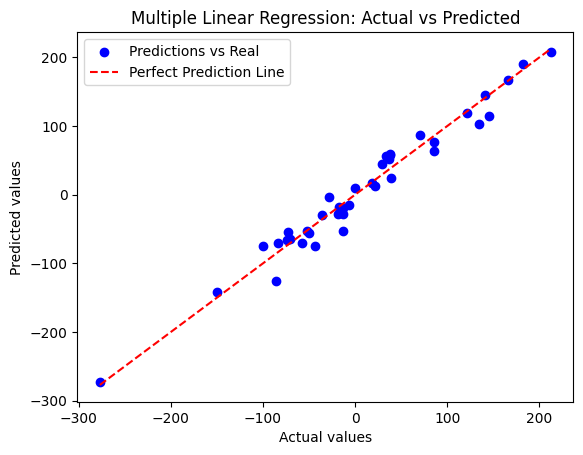

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


class MultipleLinearRegression_:
    def __init__(self):
        self.alfa = 0
        self.beta = 0

    def fit(self, X, y):

        X_ = np.c_[np.ones(X.shape[0]), X]

        self.beta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
        self.alfa = self.beta[0]
        self.beta = self.beta[1:]

    def predict(self, X):
        return np.dot(X, self.beta) + self.alfa

    def coefficients(self):
        return self.alfa, self.beta

X, y, _ = make_regression(n_samples=200, n_features=3, noise=15, random_state=42)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mlr_model = MultipleLinearRegression_()
mlr_model.fit(X_train, y_train)

y_pred = mlr_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Custom Model): {mse}")
print(f"Intercept: {mlr_model.alfa}")
print(f"Coefficients: {mlr_model.beta}")

sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

y_pred_sklearn = sklearn_model.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"Mean Squared Error (Sklearn Model): {mse_sklearn}")
print(f"Intercept (Sklearn): {sklearn_model.intercept_}")
print(f"Coefficients (Sklearn): {sklearn_model.coef_}")

plt.scatter(y_test, y_pred, color='blue', label='Predictions vs Real')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

Mean Squared Error (Sklearn Model): 298.40338662921187
Intercept (Sklearn): -0.9546742543629492
Coefficients (Sklearn): [71.82784635 22.35108511 72.61417828]


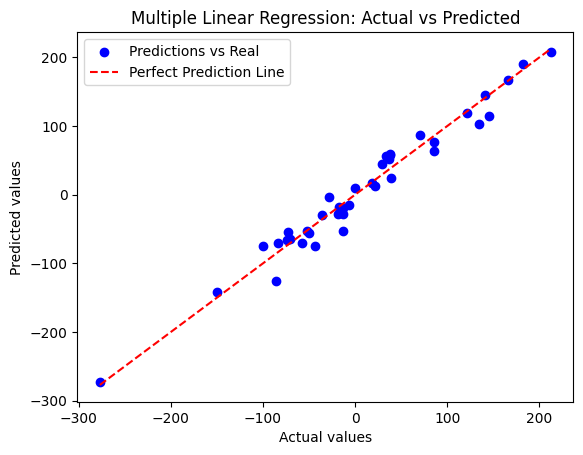

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=3, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Sklearn Model): {mse}")
print(f"Intercept (Sklearn): {model.intercept_}")
print(f"Coefficients (Sklearn): {model.coef_}")

# Wizualizacja wyników
# Ponieważ mamy 3 cechy, nie możemy zobaczyć wszystkiego w 2D, ale możemy porównać wyniki MSE i współczynniki
# Wyświetlamy wykres porównujący wartości rzeczywiste i przewidywane dla y

plt.scatter(y_test, y_pred, color='blue', label='Predictions vs Real')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

Średni błąd kwadratowy: 4061.8259284949268


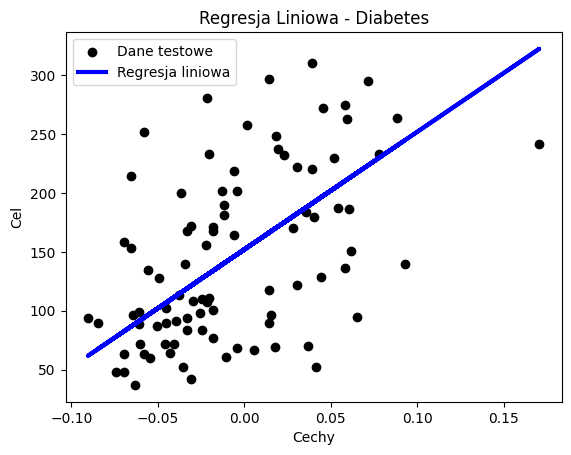

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Załaduj zestaw danych diabetes
diabetes = datasets.load_diabetes()

# Użyj tylko jednej cechy do prostoty
X = diabetes.data[:, np.newaxis, 2]  # Wybieramy trzecią kolumnę
y = diabetes.target

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie modelu regresji liniowej
model = LinearRegression()

# Trening modelu
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczanie średniego błędu kwadratowego
mse = mean_squared_error(y_test, y_pred)

print(f"Średni błąd kwadratowy: {mse}")

# Wykres regresji liniowej
plt.scatter(X_test, y_test, color='black', label='Dane testowe')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresja liniowa')
plt.xlabel('Cechy')
plt.ylabel('Cel')
plt.title('Regresja Liniowa - Diabetes')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Załaduj zestaw danych diabetes
diabetes = datasets.load_diabetes()

# Użyj tylko jednej cechy do prostoty
X = diabetes.data[:, np.newaxis, 2]  # Wybieramy trzecią kolumnę
y = diabetes.target

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie modelu regresji liniowej
model = SimpleLinearRegression()

# Trening modelu
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczanie średniego błędu kwadratowego
mse = mean_squared_error(y_test, y_pred)

print(f"Średni błąd kwadratowy: {mse}")

# Wykres regresji liniowej
plt.scatter(X_test, y_test, color='black', label='Dane testowe')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresja liniowa')
plt.xlabel('Cechy')
plt.ylabel('Cel')
plt.title('Regresja Liniowa - Diabetes')
plt.legend()
plt.show()

NameError: name 'SimpleLinearRegression' is not defined

Średni błąd kwadratowy: 4061.8259284949268


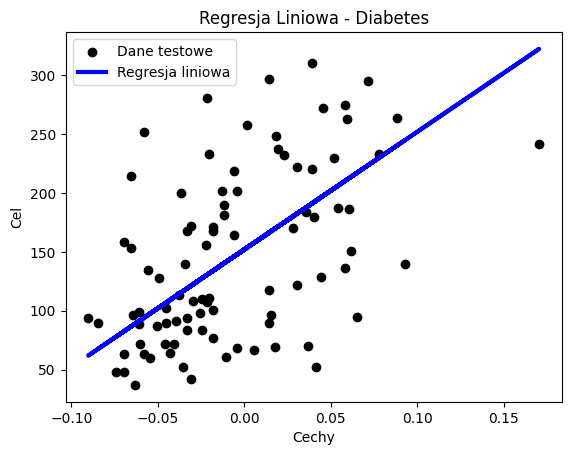

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class SimpleLinearRegression():
    def __init__(self):
        self.alfa = 0
        self.beta = 0

    def fit(self, X, y):
        X = X.ravel()  # Upewnij się, że X jest jednowymiarowy
        self.beta = np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
        self.alfa = np.mean(y) - self.beta * np.mean(X)

    def predict(self, X):
        X = X.ravel()  # Upewnij się, że X jest jednowymiarowy
        return self.alfa + self.beta * X

    def coefficients(self):
        return self.alfa, self.beta

# Załaduj zestaw danych diabetes
diabetes = datasets.load_diabetes()

# Użyj tylko jednej cechy do prostoty
X = diabetes.data[:, np.newaxis, 2]  # Wybieramy trzecią kolumnę
y = diabetes.target

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie modelu
model = SimpleLinearRegression()

# Trening modelu
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczanie średniego błędu kwadratowego
mse = mean_squared_error(y_test, y_pred)

print(f"Średni błąd kwadratowy: {mse}")

# Wykres regresji liniowej
plt.scatter(X_test, y_test, color='black', label='Dane testowe')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresja liniowa')
plt.xlabel('Cechy')
plt.ylabel('Cel')
plt.title('Regresja Liniowa - Diabetes')
plt.legend()
plt.show()

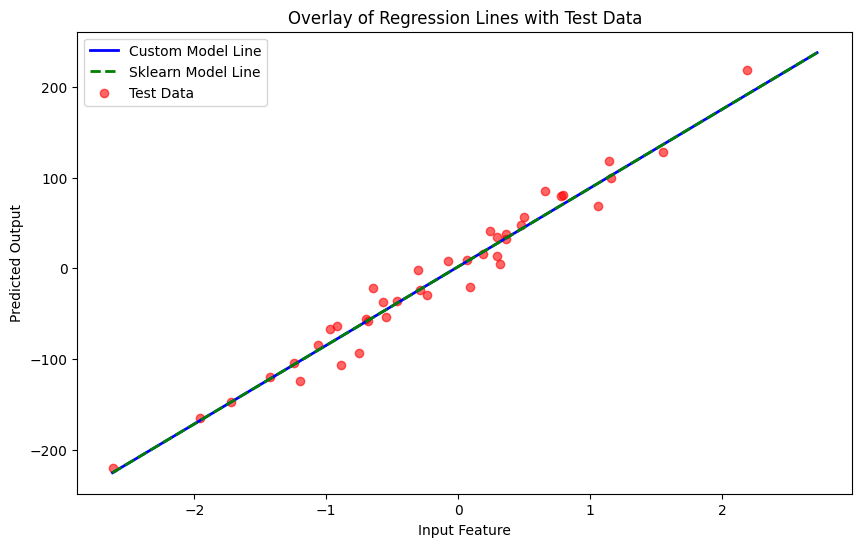

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generowanie danych
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Własna implementacja regresji liniowej
class MultipleLinearRegression:
    def __init__(self):
        self.alfa = 1
        self.beta = None

    def fit(self, X, y):
        X_ = np.c_[np.ones(X.shape[0]), X]
        self.beta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
        self.alfa = self.beta[0]
        self.beta = self.beta[1:]

    def predict(self, X):
        return np.dot(X, self.beta) + self.alfa

    def coefficients(self):
        return self.alfa, self.beta

# Trening modelu własnego
mlr_model = MultipleLinearRegression()
mlr_model.fit(X_train, y_train)

# Trening modelu sklearn
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Generowanie danych do wykresu (linie regresji)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_custom_line = mlr_model.predict(x_range)
y_pred_sklearn_line = sklearn_model.predict(x_range)

# Tworzenie wykresu
plt.figure(figsize=(10, 6))

# Linie regresji
plt.plot(x_range, y_pred_custom_line, color='blue', linewidth=2, label='Custom Model Line', linestyle='-')
plt.plot(x_range, y_pred_sklearn_line, color='green', linewidth=2, label='Sklearn Model Line', linestyle='--')

# Kropki dla rzeczywistych wartości
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Test Data')

plt.xlabel('Input Feature')
plt.ylabel('Predicted Output')
plt.title('Overlay of Regression Lines with Test Data')
plt.legend()
plt.show()

##Algorytmy przeszukiwania

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
import random
import time

# tworzenie grafu
G = nx.gnp_random_graph(10000, 0.5, seed=42)

# moje dfs
def dfs(graph, start):
    visited = set()
    stack = [start]

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(neighbor for neighbor in graph[vertex] if neighbor not in visited)

# pomiar czasu
start_time = time.time()
dfs_result = dfs(G, random.choice(list(G.nodes)))
end_time = time.time()

# ile czasu
elapsed_time = end_time - start_time
print(f"DFS traversal took {elapsed_time:.4f} seconds")

DFS traversal took 9.5197 seconds


In [ ]:
import networkx as nx
import time

# Tworzenie grafu
G = nx.gnp_random_graph(10000, 0.5, seed=42)

#popmiar wbodowanego dfs
start_time = time.time()


list(nx.dfs_edges(G, source=0))

end_time = time.time()

# Czas wykonania
elapsed_time = end_time - start_time
print(f"DFS traversal took {elapsed_time} seconds")

DFS traversal took 9.53250789642334 seconds


In [ ]:
import networkx as nx
import random
import time

# Tworzenie grafu
G = nx.gnp_random_graph(10000, 0.001, seed=42)

# moje bfs
def bfs(graph, start):
    visited = set()
    queue = [start]

    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(neighbor for neighbor in graph[vertex] if neighbor not in visited)

    return visited

# czas
start_time = time.time()
bfs_result = bfs(G, random.choice(list(G.nodes)))
end_time = time.time()

# ile
elapsed_time = end_time - start_time
print(f"BFS traversal took {elapsed_time:.4f} seconds")

BFS traversal took 0.2271 seconds
